In [1]:
import PRyM.PRyM_init as PRyMini
#import PRyM.PRyM_main as PRyMmain
import PRyM.PRyM_thermo as PRyMthermo
import PRyM.test_main2 as PRyMmain
import numpy as np
import matplotlib.pyplot as plt 

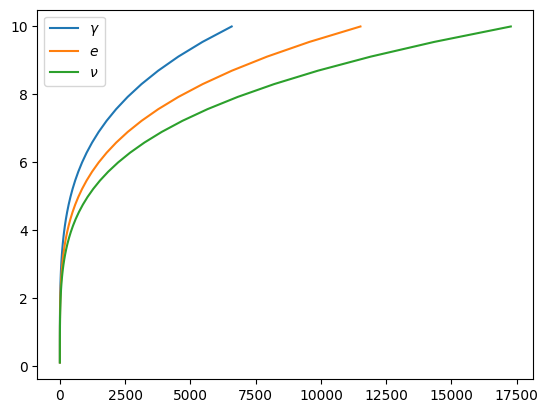

In [2]:
#extract gamma density, electron density, nu density
T = np.logspace(-1,1,100)
rho_gamma  = PRyMthermo.rho_g(T)
rho_e  = [PRyMthermo.rho_e(Tt) for Tt in T]
rho_nu_star = [3 * PRyMthermo.rho_nu(Tt) for Tt in T]

plt.plot(rho_gamma,T,label = r'$\gamma$')
plt.plot(rho_e,T,label = r'$e$')
plt.plot(rho_nu_star,T,label = r'$\nu$')
plt.legend()


In [3]:
# Run PRyMordial to compute background quantities
PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = True  # Don’t save to file unless you want to

In [4]:
# Get PRyMordial result object
res_class = PRyMmain.PRyMclass()
res_class.PRyMresults()  # Must be called once to initialize internal data

array([3.02769010e+00, 5.66814602e+00, 9.34181699e+01, 4.21665991e-01,
       4.23409116e-01, 1.96693684e+03, 1.15183184e+01, 1.76090689e+02])

In [6]:
res_class.Hubble

<bound method PRyMclass.Hubble of <PRyM.test_main2.PRyMclass object at 0x7f783992f0a0>>

In [14]:
len(Tg)

1200

In [17]:
rho_tot

array([7.06843637e+04, 6.82087614e+04, 6.58196297e+04, ...,
       3.67956053e-14, 3.55068107e-14, 3.42631668e-14])

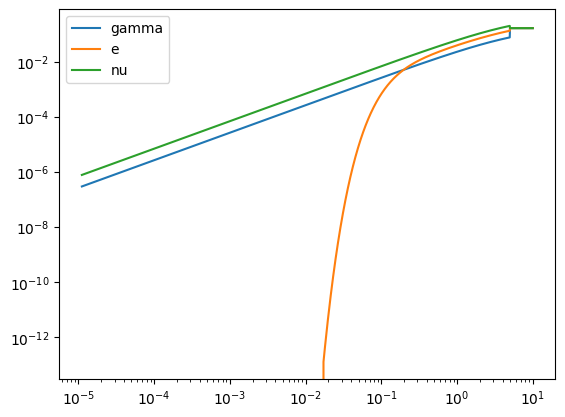

In [20]:
Tg = res_class.Tg_vec   #T_gamma or temperature of photon thermal bath
H_vec = np.vectorize(res_class.Hubble)(res_class.Tg_vec, res_class.Tnu_vec, res_class.Tnu_vec) / PRyMini.MeV_to_secm1
rho_tot = 3 * H_vec**2 / (8 * np.pi * PRyMini.GN)

#extract gamma density, electron density, nu density
rho_gamma  = np.array([PRyMthermo.rho_g(Tt) for Tt in Tg])
rho_e  = np.array([PRyMthermo.rho_e(Tt) for Tt in Tg])
rho_nu = np.array([3 * PRyMthermo.rho_nu(Tt) for Tt in Tg])

#convert to Omega's
Omega_gamma = rho_gamma/rho_tot
Omega_e = rho_e/rho_tot
Omega_nu = rho_nu/rho_tot

plt.plot(Tg, Omega_gamma,label = 'gamma')
plt.plot(Tg, Omega_e,label = 'e')
plt.plot(Tg, Omega_nu,label = 'nu')
plt.xscale('log')
plt.yscale('log')
plt.legend()


In [13]:
PRyMthermo.rho_g(.1)

6.579736267392906e-05

In [10]:
print(type(res_class))
print(dir(res_class))

<class 'PRyM.PRyM_main.PRyMclass'>
['DoH', 'DoHx1e5_f', 'He3oH', 'He3oHx1e5_f', 'Li7oH', 'Li7oHx1e10_f', 'Neff', 'Neff_f', 'Omeganunonrel', 'Omeganurel', 'Omeganurel_f', 'OneOverOmeganunr_f', 'PRyMresults', 'YPBBN', 'YPBBN_f', 'YPCMB', 'YPCMB_f', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'res']


In [4]:
# Extract background arrays
Tvec = res_class.Tvec        # Photon temperatures in MeV
aTvec = res_class.aTvec      # Corresponding scale factor values
Hvec = res_class.Hvec        # Hubble values in MeV (natural units)
sBvec = res_class.sBvec      # Entropy density of baryons ~ const × a⁻³

AttributeError: 'PRyMclass' object has no attribute 'Tvec'

In [ ]:
# Constants
m_N = PRyMini.mN             # Nucleon mass in MeV
G_N = PRyMini.GN             # Newton’s constant in MeV⁻²
rho_crit = lambda H: 3 * H**2 / (8 * np.pi * G_N)

In [ ]:
# Compute baryon number density nB ~ sB × ηB
nBvec = sBvec * PRyMini.eta0b

# Compute matter energy density
rho_matter_vec = nBvec * m_N

# Compute critical density
rho_crit_vec = rho_crit(Hvec)

# Omega_matter(T)
Omega_matter_vec = rho_matter_vec / rho_crit_vec

In [ ]:
import matplotlib.pyplot as plt

plt.loglog(Tvec, Omega_matter_vec)
plt.xlabel("T [MeV]")
plt.ylabel(r"$\Omega_{\rm matter}(T)$")
plt.grid(True)
plt.title("Matter density parameter as a function of temperature")
plt.show()

In [12]:
import PRyM.PRyM_init as PRyMini
import PRyM.PRyM_main as PRyMmain

# Initialize and run PRyMordial
res_class = PRyMmain.PRyMclass()
res_class.PRyMresults()  # Make sure the internal state is initialized

# Extract necessary vectors
#Tvec = res_class.Tvec          # Photon temperature [MeV]
Yp_vec = res_class.Ypvec       # Proton abundance (dimensionless)
Yn_vec = res_class.Ynvec       # Neutron abundance (dimensionless)
sBvec = res_class.sBvec        # Entropy density of baryons [MeV^3]

# Constants
etaB = PRyMini.eta0b           # Baryon-to-photon ratio (≈ 6e-10)
m_p = PRyMini.mP               # Proton mass [MeV]
m_n = PRyMini.mN               # Neutron mass [MeV]

# Compute number density of baryons
nBvec = etaB * sBvec           # [MeV^3]

# Compute energy densities
rho_p_vec = nBvec * Yp_vec * m_p    # Proton energy density [MeV^4]
rho_n_vec = nBvec * Yn_vec * m_n    # Neutron energy density [MeV^4]
rho_baryon_total = rho_p_vec + rho_n_vec

# Optional: Plot
import matplotlib.pyplot as plt

plt.loglog(Tvec, rho_p_vec, label=r'$\rho_p$')
plt.loglog(Tvec, rho_n_vec, label=r'$\rho_n$')
plt.loglog(Tvec, rho_baryon_total, label=r'$\rho_{\rm baryons}$', linestyle='--')
plt.xlabel("Temperature $T_\gamma$ [MeV]")
plt.ylabel("Energy density [MeV$^4$]")
plt.title("Proton and Neutron Energy Densities")
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()  # Higher T on the left
plt.show()

AttributeError: 'PRyMclass' object has no attribute 'Ypvec'